# K-means кластерлеуі және аномалияны анықтау

Бұл жаттығуда сіз K-орталар алгоритмін және аномалияны анықтауды жүзеге асырасыз.

* Алдымен сіз K-меанс алгоритмінің қалай жұмыс істейтінін түсінуге көмектесетін үлгі деректер жинағымен танысасыз.
* Содан кейін сіз аномалияны анықтау алгоритмін енгізесіз және оны желідегі сәтсіз серверлерді анықтау үшін қолданасыз.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

%matplotlib inline

## 1 - K-means алгоритмін іске асыру

K-means алгоритмі — бір-біріне ұқсас деректерді автоматты түрде топтастыру әдісі.

* Нақты айтқанда, сізге оқыту жиынтығы $\{x^{(1)}, ..., x^{(m)}\}$ беріледі, және сіз деректерді бірнеше тығыз «кластерлерге» топтағыңыз келеді.

* K-means итеративті процедура болып табылады, яғни:
  * Алдымен бастапқы орталықтарды (centroids) болжап анықтайды, содан кейін
  * Бұл болжамды келесі қадамдар арқылы жетілдіреді:
    * Әр мысалды ең жақын орталыққа қайта тағайындау, және
    * Орталықтарды осы тағайындауларға сәйкес қайта есептеу.

* Псевдокод түрінде K-means алгоритмі келесідей көрінеді:

    ``` python
    # Орталықтарды инициализациялау
    # K — кластерлер саны
    centroids = kMeans_init_centroids(X, K)
    
    for iter in range(iterations):
        # Кластерге тағайындау қадамы:
        # Әрбір дерек нүктесін ең жақын орталыққа тағайындаңыз.
        # idx[i] — i-ші мысалға тағайындалған орталықтың индексі
        idx = find_closest_centroids(X, centroids)

        # Орталықты жылжыту қадамы:
        # Орталықтарға тағайындаулар бойынша орта мәндерді есептеу
        centroids = compute_means(X, idx, K)
    ```

* Алгоритмнің ішкі циклында екі негізгі қадам қайталанады:
  * (i) Әр оқыту мысалын $x^{(i)}$ оның ең жақын орталығына тағайындау, және
  * (ii) Әрбір орталықтың орта мәнін сол оған тағайындалған нүктелер негізінде қайта есептеу.

* K-means алгоритмі әрқашан орталықтардың соңғы орташа мәндер жиынтығына жинақталады.

* Алайда, жиналған шешім әрқашан мінсіз бола бермейді және бастапқы орталықтардың таңдалуына байланысты болады.
  * Сондықтан тәжірибеде K-means алгоритмі әдетте әртүрлі кездейсоқ бастапқы мәндермен бірнеше рет орындалады.
  * Әртүрлі шешімдер арасында таңдау жасау үшін, шығын функциясының (бұрылымның) ең төмен мәні бар шешімді таңдайды.

Келесі бөлімдерде сіз K-means алгоритмінің екі фазасын жеке-жеке жүзеге асырасыз:
* Алдымен `find_closest_centroid` функциясын аяқтап, содан кейін `compute_centroids` функциясын орындайсыз.

### 1.1 Ең жақын орталықтарды табу

K-means алгоритмінің «кластерге тағайындау» кезеңінде алгоритм ағымдағы орталықтардың орналасуына сүйене отырып, әрбір оқыту мысалы $x^{(i)}$-ті оған ең жақын орталыққа тағайындайды.

### Жаттығу 1

Сіздің тапсырмаңыз – `find_closest_centroids` кодын аяқтау.
* Бұл функция деректер матрицасы `X` пен барлық орталықтардың орналасуын қамтитын `centroids` айнымалысын алады.
* Нәтижесінде, ол `X` матрицасымен бірдей элементтер санын иеленетін бір өлшемді `idx` массивін шығару керек, мұнда әрбір оқыту мысалына ең жақын орталықтың индексі ($\{1,...,K\}$, мұнда $K$ – орталықтардың жалпы саны) жазылады.
* Нақты айтқанда, әрбір мысал $x^{(i)}$ үшін келесі түрде тағайындау жасалады:
  $$c^{(i)} := j \quad \mathrm{ең \;төмен мәнді қамтамасыз етеді} \quad ||x^{(i)} - \mu_j||^2,$$
  мұнда:
   * $c^{(i)}$ – $x^{(i)}$  мысалына ең жақын орталықтың индексі (бастапқы кодтағы `idx[i]` сәйкес келеді), және
   * $\mu_j$  – $j$’-ші орталықтың орналасуы (немесе мәні). (бастапқы кодта `centroids` ретінде сақталады)



In [2]:
def find_closest_centroids(X, centroids):
    """
    Әрбір мысал үшін орталыққа мүшеліктерін есептейді.

    Параметрлері:
        X (ndarray): (m, n) енгізу мәндері
        centroids (ndarray): k орталықтар

    Қайтарылады:
        idx (array_like): (m,) ең жақын орталықтардың индекстері
    """

    # K-ны орнату
    K = centroids.shape[0]

    # Төмендегі айнымалыны дұрыс толтыру керек:
    idx = np.zeros(X.shape[0], dtype=int)

    ### ОСЫНДА КОДЫН ЖАЗЫҢЫЗ ###


    ### ОСЫНДА КОДЫН АЯҚТАҢЫЗ ###

    return idx


Енді мысал деректер жиынын пайдаланып іске асыруды тексерейік

In [3]:
# Пайдаланылатын мысал деректер жиынтығын жүктеу
X = load_data()

Төмендегі код X айнымалысының алғашқы бес элементі мен оның өлшемдерін басып шығарады


In [4]:
print("X айнымалысының алғашқы бес элементі:\n", X[:5])
print("X айнымалысының өлшемі:", X.shape)

X айнымалысының алғашқы бес элементі:
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
X айнымалысының өлшемі: (300, 2)


In [5]:
# Алғашқы орталықтар жиынтығын таңдау (3 орталық)
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

# initial_centroids пайдаланып ең жақын орталықтарды табу
idx = find_closest_centroids(X, initial_centroids)

# idx айнымалысындағы алғашқы үш элемент үшін ең жақын орталықтарды басып шығару
print("idx айнымалысындағы алғашқы үш элемент:", idx[:3])

idx айнымалысындағы алғашқы үш элемент: [0 2 1]


**Күтілетін Нәтиже**:

<table> <tr> <td><b>idx айнымалысының алғашқы үш элементі</b></td> <td> [0 2 1] </td> </tr> </table>

### Орталықтардың орта мәндерін есептеу

Әрбір нүктенің нақты бір орталыққа тағайындалуына байланысты, алгоритмнің екінші кезеңі әр орталыққа тағайындалған нүктелердің орташа мәнін қайта есептейді.

### Жаттығу 2

Төмендегі `compute_centroids` функциясын аяқтап, әр орталықтың мәнін қайта есептеңіз.

* Нақты айтқанда, әрбір орталық $\mu_k$ үшін:

  $$\mu_k = \frac{1}{|C_k|} \sum_{i \in C_k} x^{(i)}$$
  
  мұндағы:
  * $C_k$  – орталық $k$  үшін тағайындалған мысалдар жиынтығы,
  * $|C_k|$ – \$C_k$ жиынтығындағы мысалдар саны.

* Мысалы, егер екі мысал, $x^{(3)}$ және $x^{(5)}$ орталық $k=2$-ге тағайындалса, онда сіз $\mu_2 = \frac{1}{2}(x^{(3)}+x^{(5)})$ деп жаңартуыңыз керек.

In [6]:
def compute_centroids(X, idx, K):
    """
    Әрбір орталыққа тағайындалған деректер нүктелерінің орташа мәнін есептеу арқылы
    жаңа орталықтарды қайта есептейді.

    Параметрлері:
        X (ndarray):   (m, n) деректер нүктелері
        idx (ndarray): (m,) X ішіндегі әрбір мысалға ең жақын орталықтың индексін
                       қамтитын массив. Нақты айтқанда, idx[i] i-ші мысалға ең жақын
                       орталықтың индексін көрсетеді.
        K (int):       орталықтардың саны

    Қайтарылады:
        centroids (ndarray): (K, n) есептелген жаңа орталықтар
    """

    # Пайдаланылатын айнымалылар
    m, n = X.shape

    # Төмендегі айнымалыны дұрыс толтыру керек:
    centroids = np.zeros((K, n))

    ### ОСЫНДА КОДЫН ЖАЗЫҢЫЗ ###


    ### ОСЫНДА КОДЫН АЯҚТАҢЫЗ ###

    return centroids

Енді төмендегі ұяшықты іске қосып, өз іске асыруыңызды тексеріңіз

In [7]:
K = 3
centroids = compute_centroids(X, idx, K)

print("Орталықтар мыналар:", centroids)

Орталықтар мыналар: [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


**Күтілетін Нәтиже**:

2.42830111 3.15792418

5.81350331 2.63365645

7.11938687 3.6166844

## 2 - Мысалдық деректер жиынтығында K-means

Жоғарыда екі функцияны (`find_closest_centroids` және `compute_centroids`) аяқтағаннан кейін, келесі қадам ретінде K-means алгоритмін екі өлшемді мысал деректер жиынтығында іске қосу керек, бұл оның қалай жұмыс істейтінін түсінуге көмектеседі.  
* Төмендегі `run_kMeans` функциясын қарап шығыңыз, оның жұмысын түсіну үшін.  
* Назар аударыңыз: код сіздің жазған екі функцияңызды цикл ішінде қайта-қайта шақырады.

Кодты іске қосқанда, алгоритмнің әр итерациясындағы прогрессті көрсететін визуализация пайда болады.


In [8]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    X деректер матрицасында, мұнда X-тің әрбір қатары жеке мысал болып табылады,
    K-Means алгоритмін іске қосады.
    """

    # Айнымалыларды инициализациялау
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)

    # K-Means алгоритмін іске қосу
    for i in range(max_iters):

        # Прогресті шығару
        print("K-Means итерациясы %d/%d" % (i, max_iters-1))

        # X-тегі әрбір мысал үшін, оны ең жақын орталыққа тағайындаңыз
        idx = find_closest_centroids(X, centroids)

        # Қалауыңыз бойынша прогресті суреттеу
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids

        # Тағайындауларды ескере отырып, жаңа орталықтарды есептеу
        centroids = compute_centroids(X, idx, K)
    plt.show()
    return centroids, idx

K-Means итерациясы 0/9
K-Means итерациясы 1/9
K-Means итерациясы 2/9
K-Means итерациясы 3/9
K-Means итерациясы 4/9
K-Means итерациясы 5/9
K-Means итерациясы 6/9
K-Means итерациясы 7/9
K-Means итерациясы 8/9
K-Means итерациясы 9/9


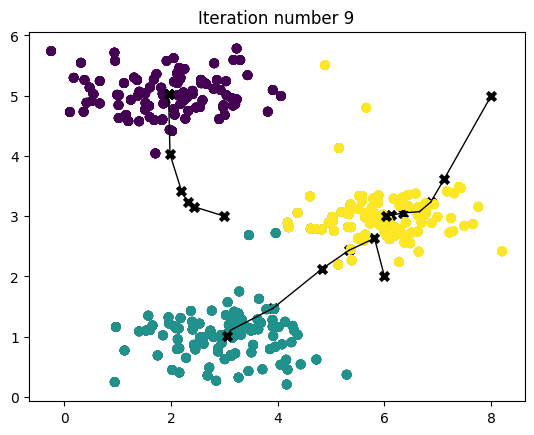

In [9]:
# Мысал деректер жиынтығын жүктеу
X = load_data()

# Алғашқы орталықтарды орнату
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
K = 3

# Итерациялар саны
max_iters = 10

centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

## 3 - Кездейсоқ Инициализация

Мысал деректер жиынтығы үшін орталықтардың бастапқы тағайындалуы Figure 1-дегідей бірдей суретті көрсету мақсатында жасалған. Практикада, орталықтарды инициализациялаудың жақсы стратегиясы – оқыту жиынтығынан кездейсоқ мысалдарды таңдау болып табылады.

Осы бөлімде сіз `kMeans_init_centroids` функциясының қалай іске асырылғанын түсінуіңіз керек.
* Алдымен, код мысалдардың индекстерін кездейсоқ ретке келтіреді (бұл үшін `np.random.permutation()` пайдаланылады).
* Содан соң, индекстердің кездейсоқ реті бойынша алғашқы $K$ мысалды орталық ретінде таңдайды.
    * Бұл тәсіл бірдей мысалды екі рет таңдаудан сақтайды.


In [10]:
def kMeans_init_centroids(X, K):
    """
    Бұл функция X деректер жиынтығында қолданылатын K орталықты
    инициализациялайды.

    Параметрлер:
        X (ndarray): Деректер нүктелері
        K (int):     орталықтар/кластерлер саны

    Қайтарылады:
        centroids (ndarray): Инициализацияланған орталықтар
    """

    # Мысалдардың индекстерін кездейсоқ ретке келтіру
    randidx = np.random.permutation(X.shape[0])

    # Алғашқы K мысалды орталықтар ретінде таңдау
    centroids = X[randidx[:K]]

    return centroids

Кездейсоқ таңдалған орталықтар: [[5.03611162 2.92486087]
 [6.5870565  3.37508345]
 [1.97619886 4.43489674]]
K-Means итерациясы 0/9
K-Means итерациясы 1/9
K-Means итерациясы 2/9
K-Means итерациясы 3/9
K-Means итерациясы 4/9
K-Means итерациясы 5/9
K-Means итерациясы 6/9
K-Means итерациясы 7/9
K-Means итерациясы 8/9
K-Means итерациясы 9/9


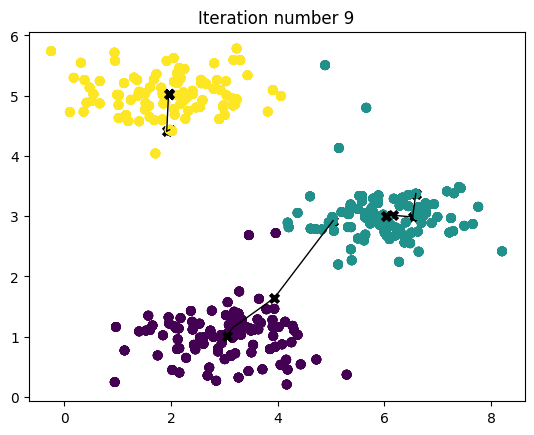

Соңғы есептелген орталықтар: [[3.04367119 1.01541041]
 [6.03366736 3.00052511]
 [1.95399466 5.02557006]]


In [11]:
# Деректер жиынтығын жүктеу
X = load_data()

# Орталықтардың санын орнатыңыз (мысалы, 3)
K = 3

# Кездейсоқ инициализацияланған орталықтарды алу
initial_centroids = kMeans_init_centroids(X, K)
print("Кездейсоқ таңдалған орталықтар:", initial_centroids)

# K-means алгоритмін іске қосу
max_iters = 10
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

# Соңғы орталықтарды шығарып тексеру
print("Соңғы есептелген орталықтар:", centroids)


## 4 - Аномалияларды анықтау

<a name="2.1"></a>
### 4.1 Мәселе сипаттамасы

Осы жаттығу барысында сіз сервер компьютерлеріндегі қалыптан тыс (аномальді) мінез-құлықты анықтау үшін аномалияларды анықтау алгоритмін жүзеге асырасыз.

Деректер жиынтығы екі сипаттамадан тұрады:  
   * әр сервердің өткізу қабілеті (мб/с) және  
   * жауап беру кідірі (мс).

Серверлеріңіз жұмыс істеп тұрғанда, олардың мінез-құлының $m=307$ мысалын жинадыңыз, осылайша сізде белгісіз $\{x^{(1)}, \ldots, x^{(m)}\}$ деректер жиынтығы бар.  
* Сіз осы мысалдардың көпшілігінің серверлердің қалыпты жұмысын көрсететін «қалыпты» (аномалиясыз) деректер екеніне сенесіз, бірақ деректер жиынтығында серверлердің қалыптан тыс әрекет ететін бірнеше мысалдары да болуы мүмкін.

Сіз деректер жиынтығындағы аномалиялы мысалдарды анықтау үшін Гаусс моделін қолданасыз.  
* Алдымен, алгоритмнің қалай жұмыс істейтінін визуалдауға мүмкіндік беретін екі өлшемді деректер жиынтығынан бастайсыз.  
* Осы деректер жиынтығы бойынша Гаусс таралуын үйлестіресіз, содан кейін ықтималдығы өте төмен мәндерді тауып, оларды аномалия деп санауға болады.  
* Соңынан, аномалияларды анықтау алгоритмін көп өлшемді үлкен деректер жиынтығына қолданасыз.

### 4.2 Деректер жиынтығы

Сіз осы тапсырмаға арналған деректер жиынтығын жүктеуден бастайсыз.  
- Төмендегі `load_data()` функциясы деректерді `X_train`, `X_val` және `y_val` айнымалыларына жүктейді:  
    - Сіз `X_train` айнымалысын Гаусс таралуын үйлестіру үшін қолданасыз;  
    - `X_val` және `y_val` айнымалылары кросс-валидация жиынтығы ретінде пайдаланылады, мұнда шекті мәнді таңдап, аномалиялы және қалыпты мысалдарды ажырата аласыз.

In [12]:
X_train, X_val, y_val = load_anomaly_data()

#### Айнымалыларды қарап шығу
Деректер жиынтығыңызбен жақынырақ танысу үшін әр айнымалының мәндерін шығарып көрейік.  
- Жақсы бастау орны ретінде әр айнымалының не қамтитынын тексеру үшін оларды шығарып қараңыз.


In [13]:
# X_train айнымалысының алғашқы бес элементін шығару
print("X_train айнымалысының алғашқы 5 элементі:\n", X_train[:5])

# X_val айнымалысының алғашқы бес элементін шығару
print("X_val айнымалысының алғашқы 5 элементі:\n", X_val[:5])

# y_val айнымалысының алғашқы бес элементін шығару
print("y_val айнымалысының алғашқы 5 элементі:\n", y_val[:5])

X_train айнымалысының алғашқы 5 элементі:
 [[13.04681517 14.74115241]
 [13.40852019 13.7632696 ]
 [14.19591481 15.85318113]
 [14.91470077 16.17425987]
 [13.57669961 14.04284944]]
X_val айнымалысының алғашқы 5 элементі:
 [[15.79025979 14.9210243 ]
 [13.63961877 15.32995521]
 [14.86589943 16.47386514]
 [13.58467605 13.98930611]
 [13.46404167 15.63533011]]
y_val айнымалысының алғашқы 5 элементі:
 [0 0 0 0 0]


#### Деректерді визуалдау

Кез келген тапсырмаға кіріспес бұрын, деректерді визуалдау арқылы оны жақсырақ түсіну пайдалы.  
- Осы деректер жиынтығы үшін, тек екі қасиеті (өткізу қабілеті мен кідірі) болғандықтан, \(X\_train\) деректерін тарамал диаграмма арқылы көрсетсеңіз болады.

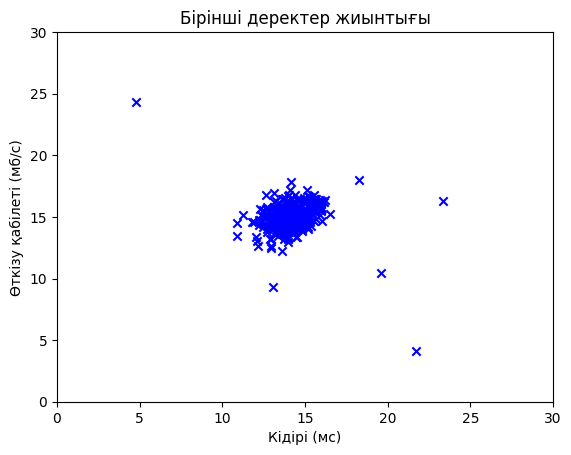

In [14]:
# Деректерді тарамал диаграмма ретінде визуалдау. Маркерлерді көк "x" белгісімен көрсету үшін
# 'marker' және 'c' параметрлері қолданылған.
plt.scatter(X_train[:, 0], X_train[:, 1], marker='x', c='b')

# Тақырыпты орнату
plt.title("Бірінші деректер жиынтығы")
# Y-осьінің атауын орнату
plt.ylabel('Өткізу қабілеті (мб/с)')
# X-осьінің атауын орнату
plt.xlabel('Кідірі (мс)')
# Ось шектерін орнату
plt.axis([0, 30, 0, 30])
plt.show()

### 4.3 Гаусс таралуы

Аномалияларды анықтау үшін, сіз алдымен деректердің таралуына модель үйлестіруіңіз қажет.

* Оқыту жиынтығы $\{x^{(1)}, ..., x^{(m)}\}$ берілген жағдайда, әрбір қасиет  $x_i$ үшін Гаусс таралуын бағалауыңыз керек.

* Есіңізде болсын, Гаусс таралуы келесі түрде беріледі:

    $$ p(x ; \mu,\sigma ^2) = \frac{1}{\sqrt{2 \pi \sigma ^2}}\exp^{ - \frac{(x - \mu)^2}{2 \sigma ^2} }$$

   мұнда $\mu$ – орташа мән, ал $\sigma^2$ дисперсияны басқарады.
   
* Әрбір қасиет $i = 1\ldots n$ үшін, сіз $i$-ші өлшемдегі деректер
$\{x_i^{(1)}, ..., x_i^{(m)}\}$ (әр мысалдың $i$-ші өлшемі) сәйкес келетін $\mu_i$ және $\sigma_i^2$ параметрлерін табуыңыз қажет.


**Іске асыру**:

Сіздің тапсырмаңыз төмендегі `estimate_gaussian` кодын аяқтау.

### Жаттығу 3

Төмендегі `estimate_gaussian` функциясын аяқтап, `mu` (X-тегі әрбір қасиеттің орташа мәні) және `var` (X-тегі әрбір қасиеттің дисперсиясы) есептеңіз.

Әрбір $i$-ші қасиеттің параметрлері, яғни ($\mu_i$, $\sigma_i^2$) мына теңдеулерді қолдана отырып бағаланады. Орташа мәнді есептеу үшін:

$$\mu_i = \frac{1}{m} \sum_{j=1}^m x_i^{(j)}$$

Ал дисперсияны есептеу үшін:

$$\sigma_i^2 = \frac{1}{m} \sum_{j=1}^m \left(x_i^{(j)} - \mu_i\right)^2$$


In [15]:
def estimate_gaussian(X):
    """
    Деректер жиынтығындағы барлық қасиеттердің орташа мәні мен дисперсиясын есептейді.

    Параметрлері:
        X (ndarray): (m, n) деректер матрицасы

    Қайтарылады:
        mu (ndarray): (n,) барлық қасиеттердің орташа мәні
        var (ndarray): (n,) барлық қасиеттердің дисперсиясы
    """

    m, n = X.shape

    ### ОСЫНДА КОДЫН ЖАЗЫҢЫЗ ###


    ### ОСЫНДА КОДЫН АЯҚТАҢЫЗ ###

    return mu, var

Сіздің жүзеге асыруыңыздың дұрыстығын төмендегі тест кодын іске қосу арқылы тексере аласыз:

In [16]:
# Әрбір қасиеттің орташа мәні мен дисперсиясын бағалау
mu, var = estimate_gaussian(X_train)

print("Әр қасиеттің орташа мәні:", mu)
print("Әр қасиеттің дисперсиясы:", var)

Әр қасиеттің орташа мәні: [14.11222578 14.99771051]
Әр қасиеттің дисперсиясы: [1.83263141 1.70974533]


**Күтілетін нәтиже**:
<table>
  <tr>
    <td><b>Әр қасиеттің орташа мәні:</b></td>
    <td>[14.11222578 14.99771051]</td>
  </tr>    
  <tr>
    <td><b>Әр қасиеттің дисперсиясы:</b></td>
    <td>[1.83263141 1.70974533]</td>
  </tr>
</table>

Енді сіз `smeta_gaussian` кодын толтырдыңыз, біз бекітілген Гаусс үлестірімінің контурларын визуализациялаймыз.



Сіздің сюжеттеріңізден мысалдардың көпшілігі ықтималдығы жоғары аймақта, ал аномальды мысалдар ықтималдығы төмен аймақтарда екенін көруге болады.

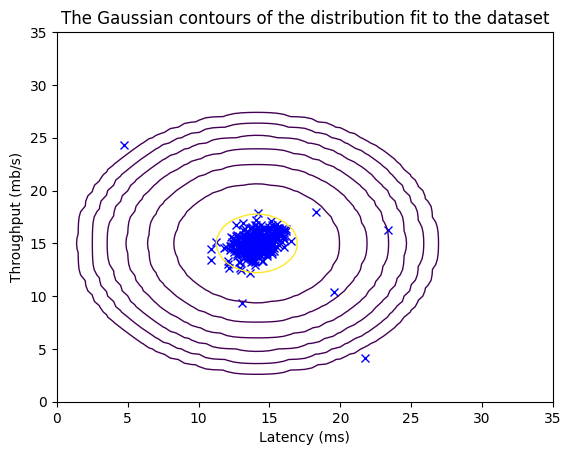

In [17]:
# Әрбір дерек нүктесі үшін көпөлшемді нормал үлестірімнің тығыздығын есептеу
p = multivariate_gaussian(X_train, mu, var)

# Графикті сызу
visualize_fit(X_train, mu, var)

### 2.2.2 Шекті мән $\epsilon$-ді таңдау

Енді сіз Гаусс параметрлерін бағаладыңыз, осы үлестірімге байланысты қай мысалдардың ықтималдығы жоғары, ал қайсысының ықтималдығы өте төмен екенін тексере аласыз.

* Ықтималдығы төмен мысалдар — деректер жиынтығындағы аномалиялар болуы мүмкін.
* Аномалияларды анықтаудың бір жолы — кросс-валидация жиынтығы негізінде шекті мән (threshold) таңдау.

Осы бөлімде сіз `select_threshold` функциясын аяқтайсыз, мұнда кросс-валидация жиынтығындағы $F_1$ метрикасы негізінде шекті $\varepsilon$  мәні таңдалады.

* Бұл үшін біз кросс-валидация жиынтығын қолданамыз:
$\{(x_{\rm cv}^{(1)}, y_{\rm cv}^{(1)}),\ldots, (x_{\rm cv}^{(m_{\rm cv})}, y_{\rm cv}^{(m_{\rm cv})})\}$
мұнда:
  * $y=1$  болса — бұл мысал аномалия,
  * $y=0$  болса — бұл мысал қалыпты.

* Әрбір кросс-валидация мысалы үшін $p(x_{\rm cv}^{(i)})$ ықтималдығын есептейміз. Бұл ықтималдықтар векторы `p_val` айнымалысына жіберіледі.
* Сәйкес белгілер `y_val` айнымалысында беріледі.


### Жаттығу 4

Төмендегі `select_threshold` функциясын аяқтап, валидация нәтижелері (`p_val`) мен нақты белгілер (`y_val`) негізінде аномалияларды анықтау үшін ең жақсы шекті мәнді табыңыз.

* `select_threshold` функциясында $\varepsilon$ үшін бірнеше мүмкін мәндерді тексеретін цикл дайын берілген, ол $F_1$ көрсеткіші ең жоғары болған мәнді таңдайды.

* Сіздің міндетіңіз — берілген `epsilon` шегі бойынша F1 көрсеткішін есептеу және оны `F1` айнымалысына жазу.

  * Есіңізде болсын, егер $p(x) < \varepsilon$ болса, онда бұл мысал аномалия ретінде жіктеледі.

  * Содан кейін дәлдік (precision) және толықтық (recall) келесі формулалармен есептеледі:
    
    \begin{aligned}
   prec&=&\frac{tp}{tp+fp}\\
   rec&=&\frac{tp}{tp+fn},
   \end{aligned}

    мұндағы:
    * $tp$: нақты аномалия және дұрыс анықталған (true positive),
    * $fp$: нақты қалыпты, бірақ аномалия ретінде қате анықталған (false positive),
    * $fn$: нақты аномалия, бірақ қалыпты ретінде қате анықталған (false negative).

  * F1 көрсеткіші:
     $$F_1 = \frac{2\cdot prec \cdot rec}{prec + rec}$$

**Іске асыру туралы ескерту**:  
$tp$, $fp$, $fn$ мәндерін есептеу үшін барлық мысалдарды айналатын циклдің орнына векторланған амалдарды қолдануға болады.


In [18]:
def select_threshold(y_val, p_val):
    """
    Аномалияларды анықтау үшін ең жақсы шекті мәнді табады
    (валидация жиынтығындағы нәтиже p_val және шын белгілер y_val негізінде)

    Параметрлер:
        y_val (ndarray): Валидация жиынтығындағы шын (нақты) белгілер
        p_val (ndarray): Валидация жиынтығындағы ықтималдық нәтижелері

    Қайтарылады:
        epsilon (float): Таңдалған шекті мән
        F1 (float):      Сол шекті мәнге сәйкес есептелген F1 көрсеткіші
    """

    best_epsilon = 0
    best_F1 = 0
    F1 = 0

    step_size = (max(p_val) - min(p_val)) / 1000

    for epsilon in np.arange(min(p_val), max(p_val), step_size):

        ### ОСЫНДА КОДЫН ЖАЗЫҢЫЗ ###


        ### ОСЫНДА КОДЫН АЯҚТАҢЫЗ ###

        if F1 > best_F1:
            best_F1 = F1
            best_epsilon = epsilon

    return best_epsilon, best_F1


Сіз өзіңіздің жүзеге асыруыңызды келесі код арқылы тексере аласыз:


In [19]:
# Валидация жиынтығы үшін ықтималдық мәндерді есептеу
p_val = multivariate_gaussian(X_val, mu, var)

# Ең жақсы шекті мән мен F1 көрсеткішін табу
epsilon, F1 = select_threshold(y_val, p_val)

# Нәтижелерді шығару
print('Кросс-валидация арқылы табылған ең жақсы epsilon мәні: %e' % epsilon)
print('Кросс-валидация жиынтығындағы ең жақсы F1 көрсеткіші: %f' % F1)

Кросс-валидация арқылы табылған ең жақсы epsilon мәні: 8.990853e-05
Кросс-валидация жиынтығындағы ең жақсы F1 көрсеткіші: 0.875000


**Күтілетін нәтиже**:
<table>
  <tr>
    <td><b>Кросс-валидация арқылы табылған ең жақсы epsilon мәні:</b></td>
    <td>8.99e-05</td>
  </tr>    
  <tr>
    <td><b>Кросс-валидация жиынтығындағы ең жақсы F1 көрсеткіші:</b></td>
    <td>0.875</td>
  </tr>
</table>

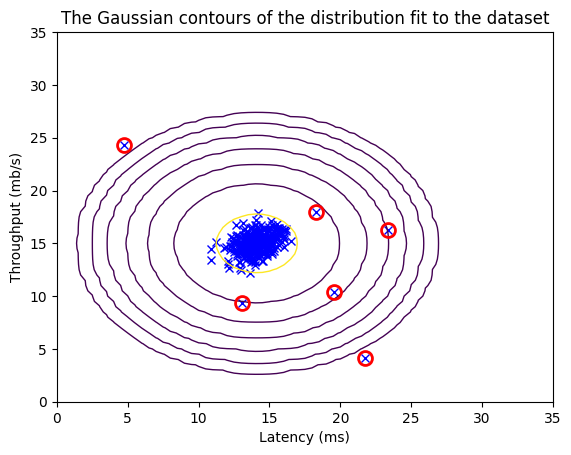

In [20]:
# Оқыту жиынтығындағы аномалияларды табу
outliers = p < epsilon

# Үйлестірілген үлестірімді визуализациялау
visualize_fit(X_train, mu, var)

# Аномалияларды қызыл шеңбермен көрсету
plt.plot(X_train[outliers, 0], X_train[outliers, 1], 'ro',
         markersize=10, markerfacecolor='none', markeredgewidth=2)

### 4.4 Жоғары өлшемді деректер жиынтығы

Енді сіз жүзеге асырған аномалияларды анықтау алгоритмін шынайырақ және әлдеқайда күрделі деректер жиынтығында іске қосамыз.

Бұл деректер жиынтығында әрбір мысал 11 қасиетпен сипатталған, бұл сіздің есептеу серверлеріңіз туралы әлдеқайда көп ақпаратты қамтиды.

Алдымен, деректер жиынтығын жүктейік.

- Төменде көрсетілген `load_data()` функциясы деректерді `X_train_high`, `X_val_high` және `y_val_high` айнымалыларына жүктейді.
    - Айнымалылардың соңындағы `_high` алдыңғы бөлімдегі айнымалылардан ажырату үшін қолданылған.
    - Біз `X_train_high` айнымалысын Гаусс үлестірімін үйлестіру үшін қолданамыз.
    - `X_val_high` және `y_val_high` кросс-валидация жиынтығы ретінде қолданылады — мұнда шекті мән таңдалады және аномалия мен қалыпты мысалдар ажыратылады.


In [21]:
# Деректер жиынтығын жүктеу
X_train_high, X_val_high, y_val_high = load_data_multi()

#### Айнымалылар өлшемдерін тексеру

Жаңа айнымалылардың өлшемдерін тексеріп, деректермен танысып алайық:

In [22]:
print('X_train_high өлшемі:', X_train_high.shape)
print('X_val_high өлшемі:', X_val_high.shape)
print('y_val_high өлшемі:', y_val_high.shape)

X_train_high өлшемі: (1000, 11)
X_val_high өлшемі: (100, 11)
y_val_high өлшемі: (100,)


#### Аномалияларды анықтау

Енді аномалияларды анықтау алгоритмін осы жаңа деректер жиынтығында іске қосамыз.

Төмендегі код сіздің бұрын жазған функцияларыңызды пайдалана отырып:

* Гаусс параметрлерін ($\mu_i$ және $\sigma_i^2$) бағалайды  
* Осы параметрлерді қолданып, оқыту жиынтығы `X_train_high` пен кросс-валидация жиынтығы `X_val_high` үшін ықтималдықтарды есептейді  
* Соңында `select_threshold` функциясын қолданып, ең жақсы шекті мән  $\varepsilon$ -ді табады  

In [23]:
# Үлкен деректер жиынтығына бірдей қадамдарды қолдану

# Гаусс параметрлерін бағалау
mu_high, var_high = estimate_gaussian(X_train_high)

# Оқыту жиынтығы үшін ықтималдықтарды есептеу
p_high = multivariate_gaussian(X_train_high, mu_high, var_high)

# Кросс-валидация жиынтығы үшін ықтималдықтарды есептеу
p_val_high = multivariate_gaussian(X_val_high, mu_high, var_high)

# Ең жақсы шекті мәнді табу
epsilon_high, F1_high = select_threshold(y_val_high, p_val_high)

# Нәтижелерді шығару
print('Кросс-валидация арқылы табылған ең жақсы epsilon мәні: %e' % epsilon_high)
print('Кросс-валидация жиынтығындағы ең жақсы F1 көрсеткіші: %f' % F1_high)
print('Анықталған аномалия саны: %d' % sum(p_high < epsilon_high))


Кросс-валидация арқылы табылған ең жақсы epsilon мәні: 1.377229e-18
Кросс-валидация жиынтығындағы ең жақсы F1 көрсеткіші: 0.615385
Анықталған аномалия саны: 117


**Күтілетін нәтиже**:
<table>
  <tr>
    <td><b>Кросс-валидация арқылы табылған ең жақсы epsilon мәні:</b></td>
    <td>1.38e-18</td>
  </tr>    
  <tr>
    <td><b>Кросс-валидация жиынтығындағы ең жақсы F1 көрсеткіші:</b></td>
    <td>0.615385</td>
  </tr>
  <tr>
    <td><b>Анықталған аномалия саны:</b></td>
    <td>117</td>
  </tr>
</table>